<a href="https://colab.research.google.com/github/GauravSahani1417/Kaggle-Datasets/blob/master/K_Means_for_Clustering_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = df.iloc[:, [3,4]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

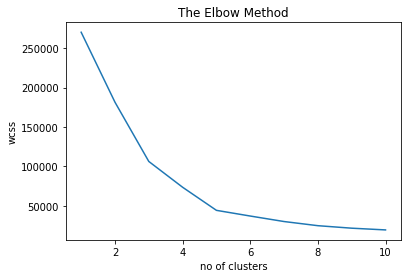

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

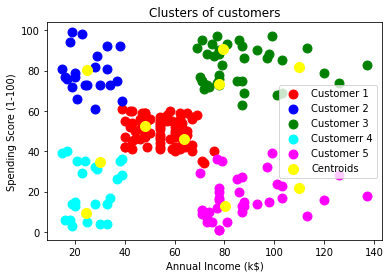

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Customer 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Customer 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Customerr 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 80, c = 'magenta', label = 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()